# Recurrent Neural Network Guide: a Deep Dive in RNN

Sequence modeling is a task of modeling sequential data. Modeling sequence data is when you create a mathematical notion to understand and study sequential data, and use those understandings to generate, predict or classify the same for a specific application. 

Sequential data has three properties:

1. Elements in the sequence can repeat
2. It follows order (contextual arrangement)
3. Length of data varies (potentially infinitely)

Example of sequential data are: 

1. Text and sentences
2. Audio (eg. speech and music)
3. Motion pictures or videos
4. Time-series data (eg. Stock market data)
5. DNA sequence, protein structures
6. Material composition 
7. Decision-making

Sequence data is difficult to model because of its properties, and it requires a different method. For instance, if sequential data is fed through a feed-forward network, it might not be able to model it well, because **sequential data has variable length.** The feed-forward network works well with fixed-size input, and doesn’t take structure into account well. 

Convolutional neural networks, on the other hand, were created to process structures, or grids of data, such as an image. They can deal with long sequences of data, but are limited by the fact that **they can’t order the sequence correctly.** 

So, **how do we build deep learning models that can model sequential data?** 

When we process sequential data, we try to model the input sequence. Unlike a supervised learning task, where we map the input with the output, in sequence modeling we try to model how **probable** the sequence is.  

- Data: $\{x_i\}_i$
- Model: $p(x) = f_\theta(x)$
- Loss: $L(\theta) = \sum_{i=1}^N \log p(f_\theta(x_i))$
- Optimization: $\theta^* = \arg \max_\theta L(\theta)$


This gives machine learning or deep learning models the ability to generate likeable sequences, or an ability to estimate the likeliness of the sequence. The rest of the process of calculating the loss function and optimisation remains the same. 

## How to model sequences: Modeling p(x)

Assuming that words in a sentence are independent to each other, we can use a corpus which tells us how probable each of the words in the English language is. 

Once we know the probability of each word (from the corpus), we can then find the probability of the entire sentence by multiplying individual words with each other. 

For instance, if we were to model the sentence “Cryptocurrency is the next big thing”, then it would look something like this:

p(“Cryptocurrency”)p(“is”)p(“the”)p(“next”)p(“big”)p(“thing”)

The above model can be described in a formula:

$$
p(x) = \Pi_{t=1}^T p(x_t)
$$

Each word is given a timestamp: t,  t-1,  t-2,  t-n, which describes the position of an individual word. 

But, it turns out that the model described above does not really capture the structure of the sequence. Why?

Because the probability of any particular word can be higher than the rest of the word. In our example, the probability of the word “the” is higher than any other word, so the resultant sequence will be “The the the the the the”.  

## Modeling p(x|context)

Although we could still modify the same model by introducing conditional probability, assuming that each word is now dependent on every other word rather than independent, we could now model the sequence in the following way: $p(x_T) = p(x_T | x_1…., x_{T-1})$. 

The same sentence “Cryptocurrency is the next big ______” can now have a range of options to choose from. For example:

| Target| $p(x \| context)$|
|--------|------------|
| Stuff     | 0.0002    |
| Thing     | 0.01     |
| Coin      | 0.00003    |


**Essentially, conditional probability describes what the next word will be.** 

But the above example can predict one word at a time; in order to predict a sequence of words we need to calculate the joint probability from the conditionals. 

$$
p(x) = \Pi_{t=1}^T p(x_t|x_1,...,x_{t-1})
$$

For instance

| Target| $p(x \| context)$|
|--------|---------------|
| Cryptocurrency     | $p(x_1)$     |
| Cryptocurrency **is**     | $p(x_2\|x_1)$      |
| Cryptocurrency is **the**      | $p(x_3\|x_2,x_1)$    |
| Cryptocurrency is the **next**     | $p(x_4\|x_3,x_2,x_1)$    |
| Cryptocurrency is the next **big**     |  $p(x_5\|x_4,x_3,x_2,x_1)$     |
| Cryptocurrency is the next big **thing**      | $p(x_6\|x_5,x_4,x_3,x_2,x_1)$ |

Note: The predicted words are written in bold

So far we understood how to go about modeling a sequence of sentences using a corpus of words (which contains probability value), and then calculating **joint** and **conditional** probability of each word in the sentence we could select the appropriate word from the corpus and predict the next word in a sentence.  

This type of approach works well with a few sentences, and **captures the structure of the data very well**. But when we deal with paragraphs, then we have to deal with **scalability**. When such models are introduced with large sentences, then processing power increases and efficiency decreases. 

# N-grams

To counter the issue of scalability, NLP (natural language processing) researchers introduced the idea of **N-grams**, where you take into account an ‘n’ number of words for conditional and joint probability. For instance, if n is equal 2, then only the previous two words of the sentence will be used to calculate joint probability instead of the entire sentence. 

| Target| $p(x \| context)$ and $n=2$|
|--------|---------------|
| Cryptocurrency     | $p(x_1)$     |
| Cryptocurrency **is**     | $p(x_2\|x_1)$      |
| Cryptocurrency is **the**      | $p(x_3\|x_2,x_1)$    |
| Cryptocurrency is the **next**     | $p(x_4\|x_3,x_2)$    |
| Cryptocurrency is the next **big**     |  $p(x_5\|x_4,x_3)$     |
| Cryptocurrency is the next big **thing**      | $p(x_6\|x_5,x_4)$ |

Note: the predicted words are written in bold

This approach reduces the scalability issue, but not completely. 

The disadvantages of N-grams are:

1. Context of the sentence is lost if the sentence is long.
2. Reduces the scalability issue by a small scale

## Context vectorizing

Context vectorizing is an approach where the input sequence is summarized to a vector such that the vector is then used to predict what the next word could be. 

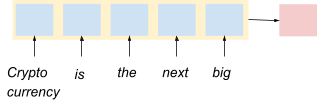

$f_\theta$ summarizes the context in h such that:

$p(x_t\|x_1,...,x_{t-1}) \approx p(x_t\|h)$

Once we find the context vector **h**, we can then use a **second function** g which produces a **probability distribution**. 

The advantages of context vectorizing are:

1. Order is preserved
2. Can operate in variable length of sequences
3. It can learn hence differentiable (backpropagation)
4. Context is preserved in short sentences or sequences. 

So far we have seen what sequential data is and how to model it. In the next section, we will learn about RNNs and how they use context vectorizing to predict the next word. 

## What are recurrent neural networks (RNNs)?

Recurrent neural networks are used to model sequential data with the time step index t, and incorporate the technique of context vectorizing. 

Context vectoring acts as “memory” which captures information about what has been calculated so far, and enables RNNs to remember past information, where they’re able to preserve information of long and variable sequences. Because of that, RNNs can take one or multiple input vectors and produce one or multiple output vectors. 

RNNs by design are similar to deep neural networks. They have input vectors, weight vectors, hidden states and output vectors. The hidden state captures the patterns or the context of a sequence into a summary vector. The outputs are influenced not just by weights applied on inputs like a regular neural network, but also by a “hidden” state vector representing the context based information on prior inputs, such that the same input could produce a different output depending on context of inputs in the sequence.

## How does RNN work?

As discussed RNNs have four major components:

1. Input
2. Hidden state
3. Weights or parameters
4. Output

To understand RNN better we need to see how the multi-layer perceptron works with sequential data.

## Multi-layer perceptron

In the multi-layer perceptron (MLP), we have an input layer, a hidden layer and an output layer. The input layer receives the input, passes it through the hidden layer where activations are applied, and then returns the output.

When multiple hidden layers are present, the activations are applied to each node of a first hidden layer, and then sent to the next hidden layer, and so forth until it reaches the last layer to produce the output. Each hidden layer is characterized by its own weights and biases, making them independent of each other. 

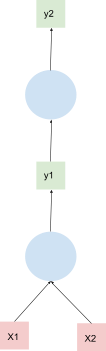

But the relationship can’t be established between the two unless we combine these hidden layers together because we’re dealing with sequences. **If the hidden layers are independent of each other, then the structure and the order will be lost**. So, in order to combine these hidden layers together, we should have the same weights and bias for each of these hidden layers.

To achieve this continuous and structured relationship between the input and output, we need to feed the input sentence word by word into all the hidden layers in a sequence, simultaneously feeding the output of the previous neuron to the next. 

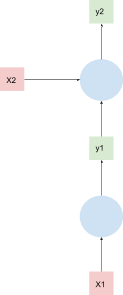

This approach makes the overall process structured and contextual. 

This is the inception of recurrent neural networks, where previous input combines with the current input, thereby preserving some relationship of the current input $(x_2)$ with the previous input $(x_1)$.

In essence, RNNs are a modified version of MLP, where the data is fed in each hidden layer.

## Recurrent neural network

In RNNs, $x(t)$​ is taken as the input to the network at time step t. The time step t in RNN indicates the order in which a word occurs in a sentence or sequence. The hidden state $h(t)$​ represents a contextual vector at time t and acts as “memory” of the network. Contextual vector $h(t)$​ is calculated based on the current input and the previous time step’s hidden state. 

For instance, take the sentence “Cryptocurrency is the next big thing”. At time $t_1$ “Cryptocurrency” will be fed into the network, at time $t_2$ “is” be fed into the network, at time $t_3$ “the” be fed into the network, and so forth. 

We denote a hidden state using this formula:

$$
h_t= \tanh(W_h h_{t-1} + W_x x_t)
$$

When $t = 1$,

$h_1= \tanh(W_hh_0+ W_xx_1)$, where $x_1$ is ‘Cryptocurrency’, and $h_0$ is initialised as zero

When $t = 2$,

$h_2= \tanh(W_hh_1 + W_xx_2)$, where $x_1$ is ‘is’. 

When $t = 3$,

$h_3= \tanh(W_hh_2 + W_xx_3)$, where $x_2$ is ‘the’. 

The weight parameters for both hidden state and input are learnable, which means that during the training it will update itself using backpropagation. 

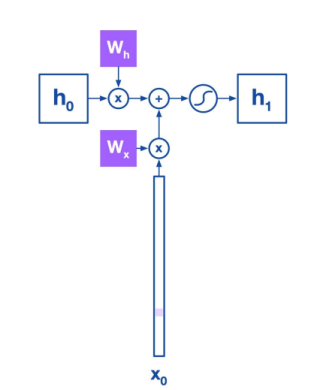

If you notice the formula above you will observe that the parameters $=\{W_h,W_x,W_y\}$ remain constant in each and every input. This is known as **parameter sharing**. Parameter sharing gives RNNs the ability to structure and retain contextual information even if the length of the sentence has variable length. Such sharing is important when we want to model a sequence where a data can reoccur quite often. **RNNs share the same weight across several time steps**.

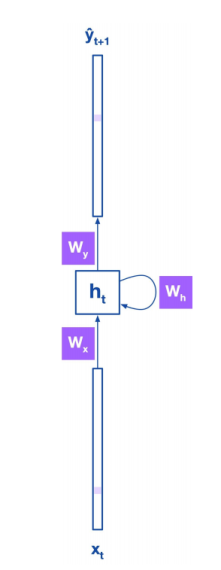

The RNNs predict the output from the last hidden state along with output parameter Wy. Prediction is more of a classification task, where a **softmax** function is used to ensure the probability over all the possible words in the english sentence. 

## Training RNNs

### Computing gradients: Backpropagation through time

So far we’ve seen how feed-forward works in RNNs, i.e. the inputs enter the network and move forward while sharing the same parameter across each time step. During backpropagation it has to go back through the time-step to update the parameters. 

So how does it happen?

As discussed earlier, predicting output in RNN is a classification task, so we use cross-entropy to calculate the loss. 

$$
L_θ(y,y’)_t = -y_t\log y_{t‘}
$$

Where $θ=\{W_h,W_x,W_y\}$

We know that the parameters are shareable, and it’s this ability of RNNs that makes all the difference in the network; it’s quite tricky to differentiate. In order to tackle this problem, the network needs to be expanded, or **unfolded**, so that the parameters could be differentiated across the network with respect to time step – hence the term backpropagation through time (BPTT). 

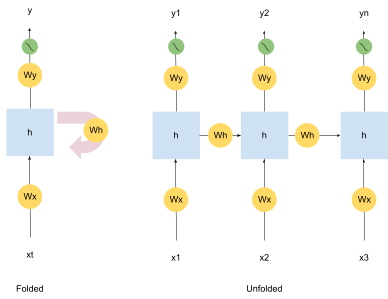

From the above diagram you can see how an unfolded recurrent network looks like. 

Since the neural network takes one word at a time, the loss calculated is based on per-word basis. The overall procedure looks like this:

$$
\begin{align}
\frac{\partial h_t}{\partial W_h} & = \frac{\partial h_t}{\partial W_h} + \frac{\partial h_t}{\partial h_{t-1}}\frac{\partial h_{t-1}}{\partial W_h} \\

& = \frac{\partial h_t}{\partial W_h} + \frac{\partial h_t}{\partial h_{t-1}}\left[ \frac{\partial h_{t-1}}{\partial W_h} + \frac{\partial h_{t-1}}{\partial h_{t-2}}\frac{\partial h_{t-2}}{\partial W_h}\right]\\

& \dots \\

& = \sum_{k=1}^t\frac{\partial h_t}{\partial h_{k}}\frac{\partial h_{k}}{\partial W_h}
\end{align}
$$

You can see how the expansion in formula takes place. 

For differentiation with respect to $W_y$, the procedure should look like this:

$$
\begin{align}
\frac{\partial L_{\theta, t}}{\partial W_y} 
& = \frac{\partial L_{\theta, t}}{\partial \hat{y_t}}\frac{\partial \hat{y_t}}{\partial W_y} \\

& = \left(y_t-\hat{y_t}\right)h_t
\end{align}
$$

So, let’s summarize backpropagation:

1. Loss is computed using the current output and the actual output using cross-entropy loss
2. The network is unrolled, or expanded, so that the backpropagation could take place through hidden layers and also through time 
3. The weights parameters are updated for both recurrent neuron, i.e. hidden state, and the dense layers

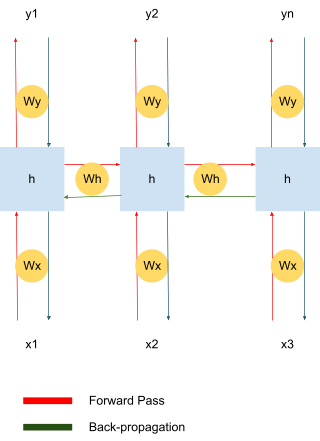

## Issues with gradients

Two common problems that occur during the backpropagation of sequential data are vanishing and exploding gradients. 

### Vanishing gradients
When the differentiating vector goes to zero exponentially fast, which in turn makes it difficult for the network to learn some long period dependencies, the problem is **vanishing gradient**.

Coming to backpropagation in RNNs, we saw that every single neuron in the network participated in the calculation of the output with respect to the cost function. Because of that, **we have to make sure that the parameters are updated for every neuron to minimize the error, and this goes back to all the neurons in time**.  So, you have to propagate all the way back through time to these neurons.

We also know that the **contextual vector, or the hidden state parameter**, is shared across the network to preserve order and continuity. During initialization, the parameter is assigned with a random number which is close to zero, and when the hidden state moves forward in time it 

gets multiplied by itself over at different time steps, making the gradient $W_h$ smaller and smaller, essentially zero to a point where it vanishes. 

**The lower the gradient is, the harder it is for the network to update the weights, and if the gradient is zero, the weights will not be updated**.

### Exploding gradients

Exploding gradients occur when large gradients accumulate due to an unstable process, and result in very large updates to the parameters. 

In RNNs, exploding gradients can occur during backpropagation and result in very large gradients essentially making large updates to the network parameters. At an extreme, the values of weights can become so large that they become NaN values.

## Overcoming gradient issues

Gradient issues in RNNs can be solved with:

1. Gradient clipping
2. Gated networks 

### Gradient clipping

Gradient clipping is a technique used to avoid exploding gradients. It’s fair to assume that RNNs behave in an approximate linear fashion, which makes the gradient unstable. 

In order to control the gradient, it’s clipped, or reshaped to a smaller value. There are two ways to clip gradients:

1. Clip the gradient from a mini batch just before the parameter is updated 
2. Use a hyperparameter C which measures the norm ||g|| where g is the gradient. If $\Vert g\Vert > C$ then $gg.C/\Vert g|\Vert$ 

### Gated networks 

To tackle vanishing gradients, you can use new architectures with gated mechanisms. Architecture like long short term memory, and gated recurrent networks have been proven to solve vanishing gradients. We’ll dive into them in the next section.

## Types of RNN
We’ll discuss fives types of RNN:

- Bidirectional RNN
- Encoder-decoder sequence-to-sequence architecture
- LSTM
- GRU
- Convolutional recurrent neural network

## Bidirectional RNN

In sequence modeling, so far we assumed that our goal is to model the next output given a particular sequence of sentences. In an NLP task, there might be a situation where the context depends on the future sentence. 

For instance:

- I am ___.
- I am ___ hungry.
- I am ___ hungry, and I can eat the whole pie.

In the above example, the answer can be ‘hungry’, ‘not’, ‘very’ respectively. But in order to understand the context, especially when the overall context depends on the future word, we need to design a model that takes the future word into consideration. 

One drawback with RNNs is that they take into account the past and the present word in time, and not the future word. This makes RNNs a **unidirectional sequential network**, where information flows in one direction, usually a forward direction.

To overcome this issue we have to introduce a mechanism where:

1. The information of the sequence travels backward 
2. The neural network considers all the three timestep past, present and future, and based upon it predicts an output. 

A bidirectional RNN is a type of network that solves this problem. It’s an architecture where two independent RNNs are put together. While one works in the conventional manner, i.e. in the forward direction, the other works in the backward direction. 

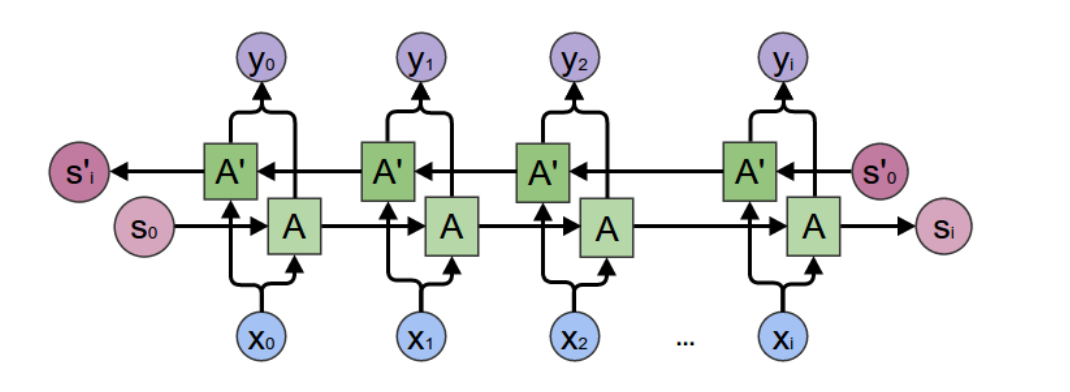

As you can see from the diagram above, both the networks output their individual output based on **past-present** (forward-directional RNNs) information and **future-present** (backward-directional RNNs) information at every time step. 

## Encoder-decoder sequence-to-sequence architecture

The advantage of using RNNs in sequential modeling is that it can:

1. Map an input sequence to a fixed-size vector
2. Map fixed-size vector to a sequence
3. Map an input sequence to an output sequence of the same length. 

But let’s say we want to train a RNN to map an input sequence to an output sequence, not necessarily of the same length. This can come up especially when we want to translate from one language to another. 

Encoder-decoder sequence-to-sequence is an architecture that deals with this type of problem. As the name suggests, it has two types of architecture: encoder and decoder. 

Encoder RNN receives the input sequence of variable length, and processes it to return a vector or a sequence of vectors called the “context” vector C.

The decoder RNN is conditioned on a fixed-length vector to generate an output sequence. Also, the last hidden state of the encoder is the initial hidden state of the decoder. 

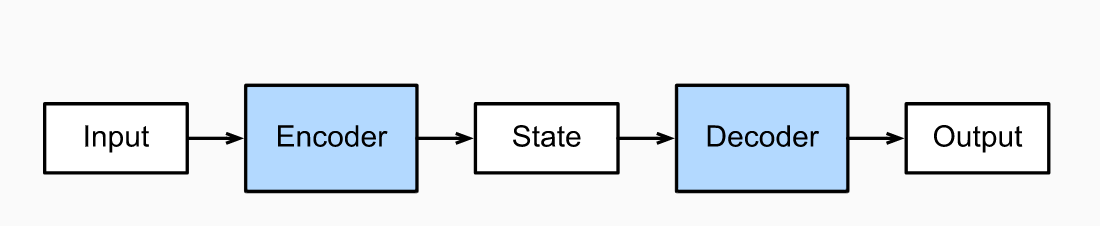

## Long Short Term Memory (LSTM)

Long short term memory was built to **preserve long term contextual information of a sequence that the RNN lacks**. 

The core idea of LSTM is to make sure the gradient flows for a long period of time, and doesn’t vanish or explode. 

As we saw earlier, RNNs have a standard architecture where the hidden state formed some sort of a looping mechanism to preserve and share the information for every time step. Well, LSTM also has a looping mechanism. Instead of having a single neural network layer, there are four neural networks, interacting in a way to preserve and share long contextual information.

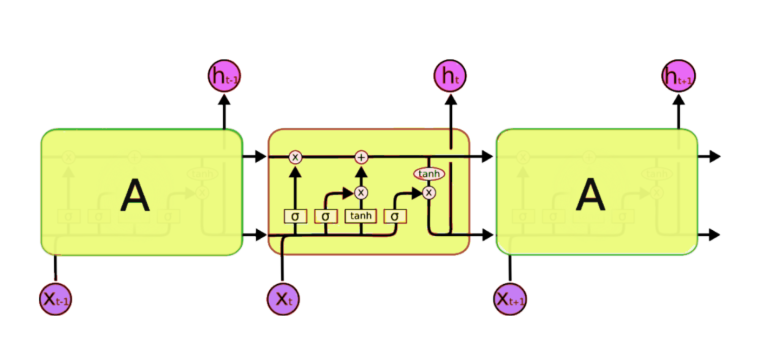

Let’s understand how the LSTM network works step-by-step:

1. **Cell state**: The **long-term memory** is usually called the cell state, denoted by $C_{t-1}$, and **recursive** in nature. Cell state allows previous information to be stored in the LSTM network. It’s modulated by the internal gates namely: forget and input gate. 

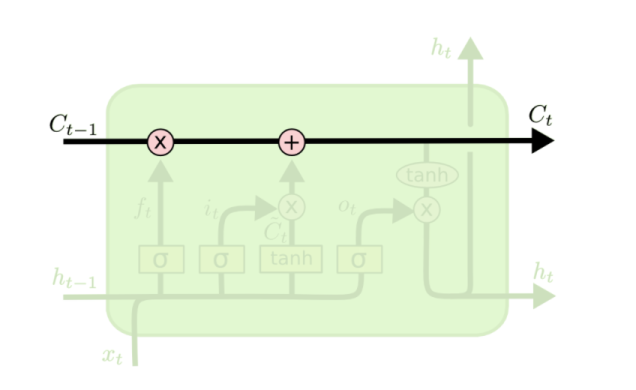

2. **Forget gate**: The cell state is connected to the forget gate which dictates which information to preserve and which to forget. It does this through a sigmoid function. It looks at the initial state at $h_{t-1}$ and $x_t$, and outputs a number between 0 and 1 for each cell state $C_{t-1}$. If the information returned by the forget gate is 1, it stores the information, and if it returns 0, it deletes the information. 

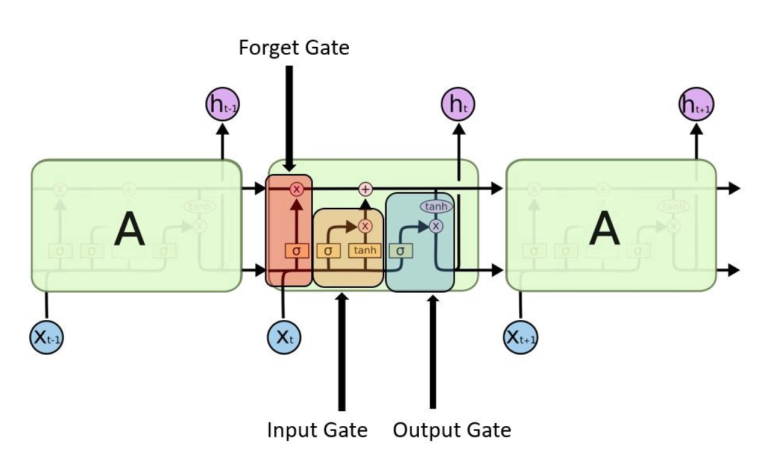

3. **Input gate**: The input gate takes the same input $x_t$ from the same initial state $h_{t-1}$ and it passes through two non-linear activation functions: sigmoid (which returns the value between 0 and 1) and $\tanh$ (which returns the value between -1 and 1), which are **input gate** $i_t$ and **candidate** memory **$\tilde{C}_t$**. This helps the cell state to save new information and simultaneously update the cell state from $C_{t-1}$ to $C_t$. The idea of the input gate is to store new information in the cell state, along with the pruned memory from the forget gate. 

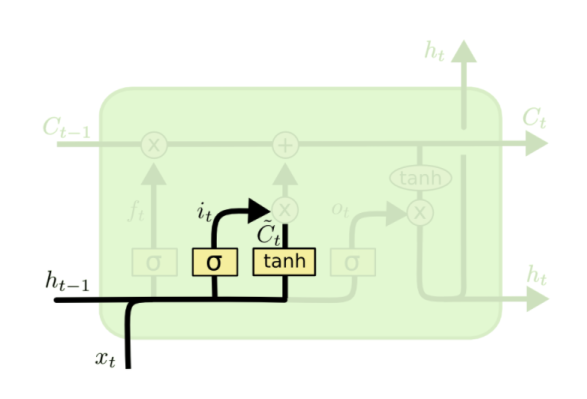

4. **Output gate**: The output will be based on the cell state $C_t$, the initial hidden state $h_{t-1}$ and input $x_t$. The hidden state and input will be passed through a sigmoid so that value is between 0 and 1. Simultaneously we pass cell state $C_t$ through the $\tanh$ to get values between 1 and -1, and multiply it by the output of the sigmoid gate, so that we only output what’s relevant to the context.

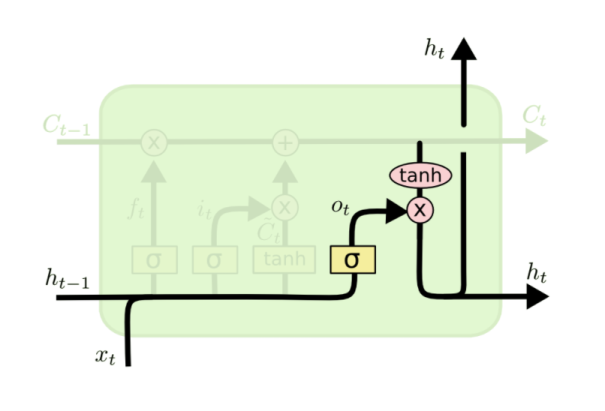

In summary:

1. The first **sigmoid activation** function is the forget gate that ensures what information should be forgotten from the previous cell state ($C_{t-1}$). 
2. The second **sigmoid** and first **tanh** activation function is for the input gate that ensures what information should be saved to the cell state along with the previous pruned information. 
3. The last sigmoid is the output gate and tanh from the cell that highlights which information should be going to the next hidden state.

## Gated Recurrent Unit (GRU)

The GRU is the newer generation of Recurrent Neural networks, and it’s the modified version of LSTM but with less complexity. GRUs use the hidden state to transfer information instead of cell state. It also only has two gates, a reset gate and update gate.

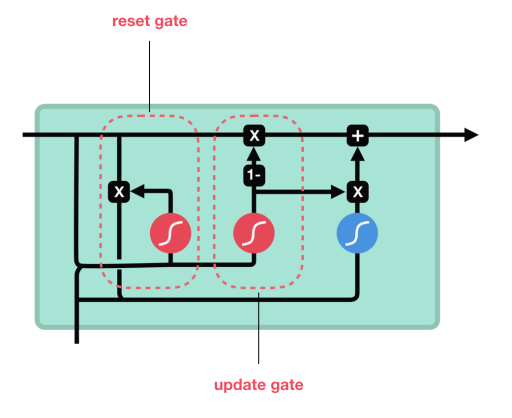

**Update Gate**: The update gate selects information that needs to be added and / or ignored. It’s similar to the LSTM input gate.

**Reset Gate**: The reset gate is used to decide how much past information to forget.

Since GRUs are smaller in operation, it’s faster than LSTM networks. And the reason both LSTMs and GRUs are successful, is because their gating mechanism:

1. Preserves contextual information and long-term sequences.
2. Avoids gradient issues. 

The gating functions allow the network to modulate how much the gradient vanishes, and since it’s being copied four times, it takes different values at each time step. The values that they take on are learned functions of the current input and hidden state.

## Convolutional recurrent neural network

The Convolutional Recurrent Neural Networks is a combination of two neural networks: convolutional neural network and recurrent neural network. Both have their own unique properties that help them excel in what they do. 

The CNNs are very good in extracting features and representation from any given data because of grid-like operation. On the other hand, the RNNs are very well suited for sequential data modeling, which in turn preserves order, structure and context.

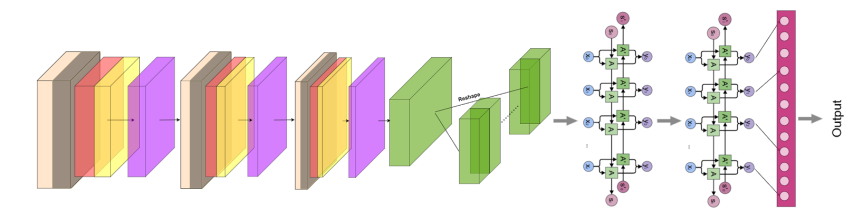

The CRNN architectures are often used to generate better / optimal results towards audio signal processing. Since audio signals like music are very complicated (a lot of noises clustered together), it becomes fairly difficult to extract low dimensional patterns and representations. Why do we need low dimensional patterns?

Because high dimensional patterns don’t offer a better understanding of the structure of data. Using CNN, we can dig deeper into high dimensional sequential structure such that it gives us low dimensional representation, which can then be fed into the RNN, or even LSTM, which can be used to generate / predict another sequence.

CRNN is also used in images to sequence application example image captioning, also it can be used to generate images from a sentence, also known as sequence-to-image.

## Implementation of RNN in Keras / Tensorflow and Python

Let’s see how we can implement RNN with keras for **character text prediction**. 

We’ll be using two libraries: numpy and tensorflow-keras.

In [3]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

In [8]:
INPUT_FILE = "deep-dive-rnn-text/alice-in-wonderland.txt"

## Data preprocessing

Data preprocessing is needed because the data contains ASCII characters, which might interfere with our modeling process and give incorrect results.

In [9]:
print("Extracting text from input")
file = open(INPUT_FILE, 'rb')
lines = []
for line in file:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
file.close()
text = " ".join(lines)

Extracting text from input


After the data is cleaned, we can create a look-up table. The look-up table basically creates a table of unique characters from the data. This table will convert the characters in the text to numbers, which will then be fed into the RNNs. 

In [10]:
chars = set([c for c in text])
nb_chars = len(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

print(index2char)

{0: '6', 1: ']', 2: 's', 3: '0', 4: ';', 5: 'w', 6: '%', 7: '4', 8: 'i', 9: '9', 10: 'h', 11: '"', 12: '8', 13: 'q', 14: '/', 15: 'c', 16: 'u', 17: 'a', 18: '5', 19: 'v', 20: '#', 21: ':', 22: 'm', 23: '-', 24: ',', 25: ' ', 26: 'e', 27: '?', 28: 'x', 29: '$', 30: "'", 31: '.', 32: '*', 33: 'z', 34: 'j', 35: '_', 36: 't', 37: ')', 38: 'o', 39: 'g', 40: 'n', 41: '3', 42: 'd', 43: 'f', 44: '2', 45: '[', 46: '(', 47: '!', 48: '@', 49: 'k', 50: 'y', 51: '1', 52: 'l', 53: 'p', 54: '7', 55: 'r', 56: 'b'}


Now, we’ll create inputs and labels. It’s important to understand that in sequence modeling, the input will start from index 0, where the label will start from index 1. 

For instance, if we feed “cryptocurrency is the next big thing”, then: 

| Input | Label|
|--------|------------|
| cryptocurrency     | is |
| is     | the   |
| the      | next  |
| next     | big   |
| big     | thing    |
| thing      |   |

Note: It’s worth mentioning that it’s a character level RNN, so instead of words you will be working with characters

In [11]:
print("Creating input and label")
SEQ_LEN = 10 #we define the size of the character sequence in one time step
STEP = 1
print("The table is ready")

Creating input and label
The table is ready


In [15]:
input_chars = []
label_chars = []
for i in range(0, len(text) - SEQ_LEN, STEP):
    input_chars.append(text[i:i + SEQ_LEN])
    label_chars.append(text[i + SEQ_LEN])

print(input_chars[:10])
print(label_chars[:10])

['project gu', 'roject gut', 'oject gute', 'ject guten', 'ect gutenb', 'ct gutenbe', 't gutenber', ' gutenberg', "gutenberg'", "utenberg's"]
['t', 'e', 'n', 'b', 'e', 'r', 'g', "'", 's', ' ']


## One-hot-encoding

Transforming sequences to one-hot-encoded vectors.

In [16]:
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQ_LEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

Vectorizing input and label text...


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we c

## Modeling the RNN

Defining the model:

1. RNN will contain 128 hidden states
2. Always remember that the dense layer should equal the number of unique characters in the text


In [17]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,
                    input_shape=(SEQ_LEN, nb_chars),
                    unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

2024-08-27 20:59:10.958269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the model

In [18]:
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # testing model
    # randomly choose a row from input_chars, then use it to 
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQ_LEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)[0]
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()

Iteration #: 0
1264/1264 [==============================] - 14s 9ms/step - loss: 2.3710
Generating from seed: lieve you 
lieve you the mad the mad the mad the mad the mad the mad the mad the mad the mad the mad the mad the mad the 
Iteration #: 1
1264/1264 [==============================] - 13s 10ms/step - loss: 2.0576
Generating from seed: f high eno
f high eno for and the ghe sald the dored the ghe sald the dored the ghe sald the dored the ghe sald the dored
Iteration #: 2
1264/1264 [==============================] - 24s 19ms/step - loss: 1.9543
Generating from seed: graphs 1.e
graphs 1.e coust in a don the greper at in a don the greper at in a don the greper at in a don the greper at i
Iteration #: 3
1264/1264 [==============================] - ETA: 0s - loss: 1.876 - 14s 11ms/step - loss: 1.8765
Generating from seed: o on.' 'wh
o on.' 'what the tore to the mant all the said the catere was the said the catere was the said the catere was 
Iteration #: 4
1264/1264 [===================

## Conclusion

In this notebook, we discussed:

1. How sequences can be modelled efficiently to capture the structure and context.  
2. How context vector provides an efficient way to summarize a sequence
3. How a multilayer perceptron can be transformed to an RNN by sequentially feeding the input directly into the hidden layer at a given time step.
4. How parameter sharing can transform an independent neural network into a continuous neural network which can be differentiated and preserve the integrity of the sequence. 
5. The issues with the gradients and how it can be rectified.
6. The different types of RNNs:
    - Bidirectional RNNs : that takes into consideration the future sequence for context-based learning.
    - Encoder-decoder RNNs: that uses two architectures to map an input sequence to an output sequence of variable length which a normal RNN could not do.
    - LSTMs: it rectifies the issues with vanishing gradient by introducing gated mechanism and also preserves long-term dependencies or long-term contexts.
    - GRU: same as LSTM but provide a simpler architecture.
    - CRNN: uses the combined architecture of CNN and RNN for better extraction of high-dimensional features into low-dimensional features and to perform sequence modeling over the extracted low-dimensional respectively. 
 
It’s a lot of stuff, so if you made it all the way to the end – thank you for reading! I hope this guide was helpful.